# Obtain GOES16/18 SW data for all of 2023

## Open single file

In [96]:
import xarray as xr
import fsspec
import gcsfs
import numpy as np
import matplotlib.pyplot as plt

url = "https://storage.googleapis.com/gcp-public-data-goes-18/ABI-L2-DSRF/2023/227/16/OR_ABI-L2-DSRF-M6_G18_s20232271600219_e20232271609527_c20232271623259.nc"
fp = fsspec.open(url)
ds = xr.open_dataset(fp.open(), engine="h5netcdf")

In [2]:
ds

<xarray.Dataset>
Dimensions:                                 (lat: 326, lon: 326,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2,
                                             number_of_LZA_bounds: 2,
                                             number_of_SZA_bounds: 2,
                                             number_of_wavelength_bounds: 2)
Coordinates:
    t                                       datetime64[ns] ...
  * lat                                     (lat) float64 81.25 80.75 ... -81.25
  * lon                                     (lon) float64 -218.2 ... -55.75
    lat_image                               float32 ...
    lon_image                               float32 ...
    retrieval_local_zenith_angle            float32 ...
    quantitative_local_zenith_angle         float32 ...
    retrieval_solar_zenith_angle            float32 ...
    quantitative_solar_zenith_angle         float32 ...
    dsr_product_wavelength                  float32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                number_of_wavelength_bounds
Data variables: (12/32)
    DSR                                     (lat, lon) float32 ...
    DQF                                     (lat, lon) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_lat_lon_projection                 int32 ...
    lat_image_bounds                        (number_of_image_bounds) float32 ...
    lon_image_bounds                        (number_of_image_bounds) float32 ...
    ...                                      ...
    std_dev_dsr                             float32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2023-08-15T16:00:21.9Z
    time_coverage_end:         2023-08-15T16:09:52.7Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        92103fc7-1d41-431c-a12e-636c8a40c3c8

## Open all files in `2023` dir using gcsfs.GCSFilesystem

In [3]:
#make a list of second to last dir (ending with the day #)
day_dir_list = [("gcp-public-data-goes-16/ABI-L2-DSRF/2023/" + f"{i}/") for i in ["{:03d}".format(i) for i in np.arange(1,366)]]

In [4]:
day_dir_list

['gcp-public-data-goes-16/ABI-L2-DSRF/2023/001/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/002/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/003/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/004/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/005/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/006/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/007/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/008/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/009/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/010/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/011/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/012/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/013/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/014/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/015/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/016/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/017/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/018/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/019/',
 'gcp-public-data-goes-16/ABI-L2-DSRF/2023/020/',


In [5]:
#flatten file list function
import itertools

def flatten_list(nested_list):
    return list(itertools.chain(*nested_list))

In [6]:
#make a list of all the hourly dirs
hour_list = []

for i in np.arange(365):
    hour_list.append(gcsfs.GCSFileSystem().ls(day_dir_list[i]))

#make a flattened list of all the files (hourly)
flattened_hour_list = flatten_list(hour_list)
file_list = []

for i in np.arange(len(flattened_hour_list)):
    file_list.append(gcsfs.GCSFileSystem().ls(flattened_hour_list[i]))

In [7]:
file_list[0][0]

'gcp-public-data-goes-16/ABI-L2-DSRF/2023/001/00/OR_ABI-L2-DSRF-M6_G16_s20230010000206_e20230010009514_c20230010021164.nc'

In [8]:
#add http protocol to each dir path
url_list = []
for i in np.arange(8728):
    url_list.append("https://storage.googleapis.com/" + file_list[i][0])

In [9]:
url_list[0]

'https://storage.googleapis.com/gcp-public-data-goes-16/ABI-L2-DSRF/2023/001/00/OR_ABI-L2-DSRF-M6_G16_s20230010000206_e20230010009514_c20230010021164.nc'

In [14]:
fp_list = list(fsspec.open_files(url_list))

In [15]:
fp_list

[<OpenFile 'https://storage.googleapis.com/gcp-public-data-goes-16/ABI-L2-DSRF/2023/001/00/OR_ABI-L2-DSRF-M6_G16_s20230010000206_e20230010009514_c20230010021164.nc'>,
 <OpenFile 'https://storage.googleapis.com/gcp-public-data-goes-16/ABI-L2-DSRF/2023/001/01/OR_ABI-L2-DSRF-M6_G16_s20230010100206_e20230010109514_c20230010120366.nc'>,
 <OpenFile 'https://storage.googleapis.com/gcp-public-data-goes-16/ABI-L2-DSRF/2023/001/02/OR_ABI-L2-DSRF-M6_G16_s20230010200206_e20230010209514_c20230010219353.nc'>,
 <OpenFile 'https://storage.googleapis.com/gcp-public-data-goes-16/ABI-L2-DSRF/2023/001/03/OR_ABI-L2-DSRF-M6_G16_s20230010300206_e20230010309514_c20230010318343.nc'>,
 <OpenFile 'https://storage.googleapis.com/gcp-public-data-goes-16/ABI-L2-DSRF/2023/001/04/OR_ABI-L2-DSRF-M6_G16_s20230010400206_e20230010409514_c20230010417340.nc'>,
 <OpenFile 'https://storage.googleapis.com/gcp-public-data-goes-16/ABI-L2-DSRF/2023/001/05/OR_ABI-L2-DSRF-M6_G16_s20230010500208_e20230010509516_c20230010518006.nc'>

In [16]:
fp_list[0].open()

<File-like object HTTPFileSystem, https://storage.googleapis.com/gcp-public-data-goes-16/ABI-L2-DSRF/2023/001/00/OR_ABI-L2-DSRF-M6_G16_s20230010000206_e20230010009514_c20230010021164.nc>

In [20]:
ds = xr.open_dataset(fp_list[0].open(), engine='h5netcdf')

In [31]:
ds1 = xr.open_dataset(fp_list[1].open(), engine='h5netcdf')

In [32]:
ds.t.values

numpy.datetime64('2023-01-01T00:05:06.022331904')

In [34]:
ds1.t.values

numpy.datetime64('2023-01-01T01:05:06.021991040')

In [42]:
ds = xr.open_dataset(fp_list[0].open(), engine='h5netcdf') 
for i in np.arange(8728):
    ds_temporary = xr.open_dataset(fp_list[i].open(), engine='h5netcdf')
    ds = xr.concat([ds, ds_temporary], dim='t')

In [101]:
ds

<xarray.Dataset>
Dimensions:                                 (lat: 326, lon: 326,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2,
                                             number_of_LZA_bounds: 2,
                                             number_of_SZA_bounds: 2,
                                             number_of_wavelength_bounds: 2)
Coordinates:
    t                                       datetime64[ns] 2023-08-15T16:05:0...
  * lat                                     (lat) float64 81.25 80.75 ... -81.25
  * lon                                     (lon) float64 -218.2 ... -55.75
    lat_image                               float32 ...
    lon_image                               float32 ...
    retrieval_local_zenith_angle            float32 ...
    quantitative_local_zenith_angle         float32 ...
    retrieval_solar_zenith_angle            float32 ...
    quantitative_solar_zenith_angle         float32 ...
    dsr_product_wavelength                  float32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                number_of_wavelength_bounds
Data variables: (12/32)
    DSR                                     (lat, lon) float32 ...
    DQF                                     (lat, lon) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_lat_lon_projection                 int32 ...
    lat_image_bounds                        (number_of_image_bounds) float32 ...
    lon_image_bounds                        (number_of_image_bounds) float32 ...
    ...                                      ...
    std_dev_dsr                             float32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2023-08-15T16:00:21.9Z
    time_coverage_end:         2023-08-15T16:09:52.7Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        92103fc7-1d41-431c-a12e-636c8a40c3c8

In [68]:
ds_cleaned = ds.isel(t=slice(1, None))

In [121]:
ds_cleaned

<xarray.Dataset>
Dimensions:                                 (t: 8728, lat: 326, lon: 326,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2,
                                             number_of_LZA_bounds: 2,
                                             number_of_SZA_bounds: 2,
                                             number_of_wavelength_bounds: 2)
Coordinates:
  * t                                       (t) datetime64[ns] 2023-01-01T00:...
  * lat                                     (lat) float64 81.25 80.75 ... -81.25
  * lon                                     (lon) float64 -156.2 -155.8 ... 6.25
    lat_image                               float32 0.0
    lon_image                               float32 -75.0
    retrieval_local_zenith_angle            float32 90.0
    quantitative_local_zenith_angle         float32 70.0
    retrieval_solar_zenith_angle            float32 90.0
    quantitative_solar_zenith_angle         float32 70.0
    dsr_product_wavelength                  float32 2.1
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                number_of_wavelength_bounds
Data variables: (12/32)
    DSR                                     (t, lat, lon) float32 nan ... nan
    DQF                                     (t, lat, lon) float32 1.0 ... 1.0
    time_bounds                             (t, number_of_time_bounds) datetime64[ns] ...
    goes_lat_lon_projection                 (t) int32 -2147483647 ... -214748...
    lat_image_bounds                        (t, number_of_image_bounds) float32 ...
    lon_image_bounds                        (t, number_of_image_bounds) float32 ...
    ...                                      ...
    std_dev_dsr                             (t) float32 161.7 107.1 ... 200.6
    percent_uncorrectable_GRB_errors        (t) float32 0.0 0.0 0.0 ... 0.0 0.0
    percent_uncorrectable_L0_errors         (t) float32 0.0 0.0 0.0 ... 0.0 0.0
    algorithm_dynamic_input_data_container  (t) int32 -2147483647 ... -214748...
    processing_parm_version_container       (t) int32 -2147483647 ... -214748...
    algorithm_product_version_container     (t) int32 -2147483647 ... -214748...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2023-01-01T00:00:20.6Z
    time_coverage_end:         2023-01-01T00:09:51.4Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        4ce9f0dd-2f19-49e0-a7e4-040acfdfb3ac

In [ ]:
#uploading era sw/sst ds from 2000 - 2012
import json
import gcsfs

with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)


gcsmap_ds = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/GOES/datasets/dsr2023.zarr')
ds_cleaned.to_zarr(gcsmap_ds, mode='w')

/srv/conda/envs/notebook/lib/python3.11/site-packages/xarray/core/dataset.py:2521: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]
/srv/conda/envs/notebook/lib/python3.11/site-packages/xarray/core/dataset.py:2521: SerializationWarning: saving variable None with floating point data as an integer dtype without any _FillValue to use for NaNs
  return to_zarr(  # type: ignore[call-overload,misc]


In [64]:
ds.t[1:]

<xarray.DataArray 't' (t: 8728)>
array(['2023-01-01T00:05:06.022331904', '2023-01-01T01:05:06.021991040',
       '2023-01-01T02:05:06.023614976', ..., '2023-12-31T21:05:05.976829952',
       '2023-12-31T22:05:05.978555008', '2023-12-31T23:05:05.977843968'],
      dtype='datetime64[ns]')
Coordinates:
  * t                                (t) datetime64[ns] 2023-01-01T00:05:06.0...
    lat_image                        float32 0.0
    lon_image                        float32 -75.0
    retrieval_local_zenith_angle     float32 90.0
    quantitative_local_zenith_angle  float32 70.0
    retrieval_solar_zenith_angle     float32 90.0
    quantitative_solar_zenith_angle  float32 70.0
    dsr_product_wavelength           float32 2.1
Attributes:
    long_name:      J2000 epoch mid-point between the start and end image sca...
    standard_name:  time
    axis:           T
    bounds:         time_bounds

In [77]:
import numpy as np

In [79]:
np.unique(ds_cleaned.t.values).shape

(8720,)

In [80]:
# Python program to print duplicates from 
# a list of integers
lis = ds_cleaned.t.values

uniqueList = []
duplicateList = []

for i in lis:
	if i not in uniqueList:
		uniqueList.append(i)
	elif i not in duplicateList:
		duplicateList.append(i)

print(duplicateList)


[numpy.datetime64('2000-01-01T11:43:21.000000000')]


In [120]:
ds_copy.t[['2023-03-04']]

IndexError: arrays used as indices must be of integer or boolean type

In [104]:
ds_copy = ds_cleaned

In [110]:
ds_copy.t.sel(t='2000-01-01T11:43:21.000000000', method='nearest')

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [69]:
gulf = ds_cleaned.DSR.sel(lat=slice(31,22), lon=slice(-100,-72))

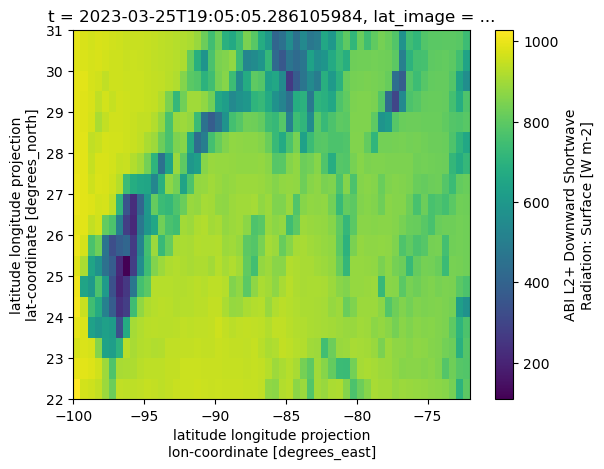

In [70]:
gulf[2010].plot()

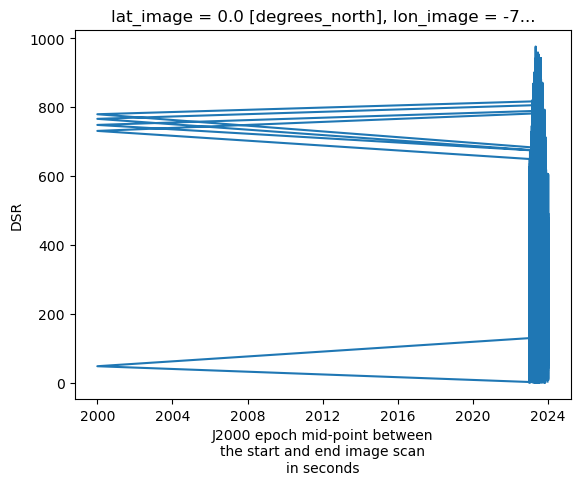

In [71]:
gulf.mean(['lat','lon']).plot()

In [39]:
xr.concat([ds, ds1], dim='t')

<xarray.Dataset>
Dimensions:                                 (t: 2, lat: 326, lon: 326,
                                             number_of_time_bounds: 2,
                                             number_of_image_bounds: 2,
                                             number_of_LZA_bounds: 2,
                                             number_of_SZA_bounds: 2,
                                             number_of_wavelength_bounds: 2)
Coordinates:
  * t                                       (t) datetime64[ns] 2023-01-01T00:...
  * lat                                     (lat) float64 81.25 80.75 ... -81.25
  * lon                                     (lon) float64 -156.2 -155.8 ... 6.25
    lat_image                               float32 0.0
    lon_image                               float32 -75.0
    retrieval_local_zenith_angle            float32 90.0
    quantitative_local_zenith_angle         float32 70.0
    retrieval_solar_zenith_angle            float32 90.0
    quantitative_solar_zenith_angle         float32 70.0
    dsr_product_wavelength                  float32 2.1
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds,
                                number_of_LZA_bounds, number_of_SZA_bounds,
                                number_of_wavelength_bounds
Data variables: (12/32)
    DSR                                     (t, lat, lon) float32 nan ... nan
    DQF                                     (t, lat, lon) float32 1.0 ... 1.0
    time_bounds                             (t, number_of_time_bounds) datetime64[ns] ...
    goes_lat_lon_projection                 (t) int32 -2147483647 -2147483647
    lat_image_bounds                        (t, number_of_image_bounds) float32 ...
    lon_image_bounds                        (t, number_of_image_bounds) float32 ...
    ...                                      ...
    std_dev_dsr                             (t) float32 161.7 107.1
    percent_uncorrectable_GRB_errors        (t) float32 0.0 0.0
    percent_uncorrectable_L0_errors         (t) float32 0.0 0.0
    algorithm_dynamic_input_data_container  (t) int32 -2147483647 -2147483647
    processing_parm_version_container       (t) int32 -2147483647 -2147483647
    algorithm_product_version_container     (t) int32 -2147483647 -2147483647
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2023-01-01T00:00:20.6Z
    time_coverage_end:         2023-01-01T00:09:51.4Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        4ce9f0dd-2f19-49e0-a7e4-040acfdfb3ac

In [17]:
ds = xr.open_mfdataset([fp_list[i].open() for i in np.arange(8728)], engine='h5netcdf')

ValueError: Could not find any dimension coordinates to use to order the datasets for concatenation

## [AWS GOES-2-GO package](https://github.com/blaylockbk/goes2go) route